# Detecting Fraud on Ethereum

## Table of Contents
1. [Data Cleaning](#milestone-1-data-cleaning)
2. [Exploratory Data Analysis](#milestone-2-eda)
3. [Feature Engineering](#milestone-3-feature-engineering)
4. [Anomaly Detection](#milestone-5-anomaly-detection)
5. [Prediction Modeling and Analysis](#milestone-6-prediction-modeling-&-analysis)



## Milestone 1: Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.clean_data import clean_data

# import data from data/transactions.csv
transactions_df = pd.read_csv('data/transactions.csv')
transactions1_df = pd.read_csv('data/transactions-1.csv')
transactions2_df = pd.read_csv('data/transactions-2.csv')
transactions3_df = pd.read_csv('data/transactions-3.csv')
transactions4_df = pd.read_csv('data/transactions-4.csv')
transactions5_df = pd.read_csv('data/transactions-5.csv')

# concatenate all data from Aug 2015 to May 2016
transactions_df = pd.concat([transactions_df, transactions1_df, transactions2_df, transactions3_df, transactions4_df, transactions5_df], ignore_index=True)

# show summary statistics
transactions_df.describe()

,nonce,block_number,transaction_index,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,max_fee_per_blob_gas,blob_versioned_hashes
count,2.757022e+06,2.757022e+06,2.757022e+06,2.757022e+06,2.757022e+06,2.757022e+06,0.0,0.0,2757022.0,0.0,0.0
mean,7.311523e+04,9.557224e+05,1.910672e+01,1.211493e+05,4.713277e+10,1.454489e+09,NaN,NaN,0.0,NaN,NaN
std,1.184674e+05,3.635530e+05,3.839124e+01,3.057998e+05,2.596874e+11,6.094498e+06,NaN,NaN,0.0,NaN,NaN
min,0.000000e+00,1.000040e+05,0.000000e+00,2.100000e+04,0.000000e+00,1.439799e+09,NaN,NaN,0.0,NaN,NaN
25%,2.540000e+02,8.085530e+05,1.000000e+00,2.100000e+04,2.000000e+10,1.452119e+09,NaN,NaN,0.0,NaN,NaN
50%,1.229300e+04,1.044760e+06,3.000000e+00,9.000000e+04,5.000000e+10,1.456177e+09,NaN,NaN,0.0,NaN,NaN
75%,9.136000e+04,1.265151e+06,1.400000e+01,9.000000e+04,5.000000e+10,1.459633e+09,NaN,NaN,0.0,NaN,NaN
max,4.890590e+05,1.388953e+06,2.230000e+02,4.712388e+06,2.100000e+14,1.461410e+09,NaN,NaN,0.0,NaN,NaN


In [2]:
# create a copy of the df to explore and manipulate #
df = transactions_df.copy()

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757022 entries, 0 to 2757021
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   hash                      object 
 1   nonce                     int64  
 2   block_hash                object 
 3   block_number              int64  
 4   transaction_index         int64  
 5   from_address              object 
 6   to_address                object 
 7   value                     object 
 8   gas                       int64  
 9   gas_price                 int64  
 10  input                     object 
 11  block_timestamp           int64  
 12  max_fee_per_gas           float64
 13  max_priority_fee_per_gas  float64
 14  transaction_type          int64  
 15  max_fee_per_blob_gas      float64
 16  blob_versioned_hashes     float64
dtypes: float64(4), int64(7), object(6)
memory usage: 357.6+ MB
None


,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,max_fee_per_blob_gas,blob_versioned_hashes
0,0xd133956b0ddcd58f30fcc60ed18d6f175b03b342b203...,164,0x9493fb89a5bd30ca0c49f9d821715b7eec06d6007aa1...,100405,0,0x007f7f58d3eb5b7510a301ecc749fc1fcddbe14d,0xb1abce2918e21ddb93aa452731a12672a3d9f75a,5000000000000000000,90000,60347544134,0x,1439806029,NaN,NaN,0,NaN,NaN
1,0x174b4f8118e1429581e9d8154c204f3c6d355b059971...,11,0x3c6e938bc68872a0f3b12a6226ba3da21fecd81a17c6...,100408,0,0xcd1e66ed539dd92fc40bbaa1fa16de8c02c14d45,0xe0e82ed3e93079ce76aac1da7b4bfa990d885a0d,174420874796219315407,21000,55854227910,0x,1439806081,NaN,NaN,0,NaN,NaN
2,0xba2f997aa470c83fbccf71f8f8d59dc972a4cd39e70c...,15,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,0,0x0a319a7e0c887f104359e1eee6717bd8f232d3da,0x32be343b94f860124dc4fee278fdcbd38c102d88,1780494800000000000,21000,59043039037,0x,1439806096,NaN,NaN,0,NaN,NaN
3,0x82776456a7f8d881eb28a29d4e4f898028742906e30f...,6,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,1,0x3b399ff2b96f27056ab8a7f6e028b0dbaf386279,0x32be343b94f860124dc4fee278fdcbd38c102d88,29277820729999998976,21000,59043039037,0x,1439806096,NaN,NaN,0,NaN,NaN
4,0xce9894a6cd506133f98c23781a2228c27ae1edc41648...,29,0x44e25aa76eb0a02fb369c20a08553b34121c2e842398...,100409,2,0xcf00a85f3826941e7a25bfcf9aac575d40410852,0xd9666150a9da92d9108198a4072970805a8b3428,5000000000000000000,90000,54588778004,0x,1439806096,NaN,NaN,0,NaN,NaN


In [3]:
# max_fee_per_gas & max_priority_fee_per_gas have no non null entries, this feature was added in the London Hardfork (Aug 2021) upgrade
# dropping these columns is ok
london_hardfork_columns = df[['max_fee_per_gas', 'max_priority_fee_per_gas']].isna().value_counts()
print(f"Number of entries with null max_fee_per_gas or max_priority_fee_per_gas: {london_hardfork_columns.sum()}")
df = df.drop(columns=['max_fee_per_gas', 'max_priority_fee_per_gas'])

# max_fee_per_blob_gas & blob_versioned_hashes have no non null entries, this feature will be added in the Proto-Danksharding upgrade
# dropping these columns is ok
danksharding_columns = df[['max_fee_per_blob_gas', 'blob_versioned_hashes']].isna().value_counts()
print(f"Number of entries with null max_fee_per_blob_gas or blob_versioned_hashes: {danksharding_columns.sum()}")
df = df.drop(columns=['max_fee_per_blob_gas', 'blob_versioned_hashes'])

Number of entries with null max_fee_per_gas or max_priority_fee_per_gas: 2757022
Number of entries with null max_fee_per_blob_gas or blob_versioned_hashes: 2757022


In [4]:
## UPDATED DATASET HAS NO MISSING VALUES FOR TO_ADDRESS AND FROM ADDRESS

# exploration of columns with null/missing values:

# to_address is missing 5/500 values, receipt_contract_address is missing 495/500
# exploration to see if this indicates directionality of the transaction

# null_to_address = df[df['to_address'].isnull()].index.tolist()
# null_receipt_address = df[df['from_address'].isnull()].index.tolist()
# print(f"Entries missing to_address: {null_to_address}")

# print("Entries missing both to_address and from_address:" + str([x for x in null_receipt_address if x in null_to_address]) + '\n')
# for idx in null_to_address:
#     receipt_address = df['from_address'].iloc[idx]
#     print(f"Receipt contract address for entry missing to_address: {receipt_address}")

# print("Number of missing receipt addresses: " + str(len(null_receipt_address)))
# print("Entries missing a to_address have a from_address, entries missing a receipt_contract_address have a to_address, these features are mutually exclusive.")

## Milestone 2: EDA
[Return to Table of Contents](#table-of-contents)

In [5]:
# Consider usable formats for features #

# Hash is a string used to identify transactions - can use index instead (?)

# what is nonce? what can this tell us about each transaction?

# BD: it's a unique number that tracks the number of transactions sent from a given address. 
# Each Ethereum account has a nonce value that increases with each transaction the account sends

# the max nonce value below shows that at least one account has sent 27671 transactions in the dataset

# HR: A question we may wish to address is whether accounts with smaller nonce are more/less likely to experience fraud? Intuition would have me think
# that accounts that make lots of transaction are "safe" - or on the flip side maybe accounts with high nonce over a short period are more likely to be fraudulent

# BD: I think this is a good question. I could buy either theory, but I think the data will show that accounts with high nonce are more likely to be fraudulent.

print(f"Max nonce: {df['nonce'].max()}")
print(f"Min nonce: {df['nonce'].min()}")
print(f"Mean nonce: {df['nonce'].mean()}")
print(f"Number of unique nonce values: {df['nonce'].nunique()}")

# Explore time stamps for frequency of transactions that contrubute to nonce
time_example = df['block_timestamp'][0]
print(f"Timestamp example entry 0: {time_example}")
timestamp_format = pd.to_datetime(time_example, unit='s')
print(f"Using timestamp format from Unix epoch: {timestamp_format}")

# Create new column to see block_timestamp in datetime format:
df['block_timestamp_dt'] = pd.to_datetime(df['block_timestamp'], unit='s')
# Create new columns to record the year, month, day, and time - good for human readability may not be useful for analysis
df['transaction_year'] = df['block_timestamp_dt'].dt.year
df['transaction_month'] = df['block_timestamp_dt'].dt.month
df['transaction_day'] = df['block_timestamp_dt'].dt.day
df['transaction_time'] = df['block_timestamp_dt'].dt.time

print('\n')
print(df['transaction_year'][:5])
print(type(df['transaction_year'][0]))
print(f"Unique transaction years: {df['transaction_year'].nunique()}")
# All transactions are from 2015

print('\n')
print(df['transaction_month'][:5])
print(type(df['transaction_month'][0]))
print(f"Unique transaction months: {df['transaction_month'].nunique()}")

print('\n')
print(df['transaction_day'][:5])
print(type(df['transaction_day'][0]))
print(f"Unique transaction days: {df['transaction_day'].nunique()}")
print('\n')

df.info()


Max nonce: 489059
Min nonce: 0
Mean nonce: 73115.2294472079
Number of unique nonce values: 488493
Timestamp example entry 0: 1439806029
Using timestamp format from Unix epoch: 2015-08-17 10:07:09


0    2015
1    2015
2    2015
3    2015
4    2015
Name: transaction_year, dtype: int32
<class 'numpy.int32'>
Unique transaction years: 2


0    8
1    8
2    8
3    8
4    8
Name: transaction_month, dtype: int32
<class 'numpy.int32'>
Unique transaction months: 8


0    17
1    17
2    17
3    17
4    17
Name: transaction_day, dtype: int32
<class 'numpy.int32'>
Unique transaction days: 31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757022 entries, 0 to 2757021
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   hash                object        
 1   nonce               int64         
 2   block_hash          object        
 3   block_number        int64         
 4   transaction_index   int64         
 5   from_addres

In [6]:
# explore wallets that receive lots of transactions:

print(f"Number of unique to_addresses: {df['to_address'].nunique()}")
print(f"Number of transactions in data set: {df['hash'].nunique()}")
print(f"Frequency of to_addresses: \n{df['to_address'].value_counts()}")

# to_address 0x32be343b94f860124dc4fee278fdcbd38c102d88 has 38797 transactions
counts = df['to_address'].value_counts()
percentiles = counts.quantile([0.25, 0.5, 0.75])
print(f"To address frequency percentiles:\n{percentiles}")


Number of unique to_addresses: 116225
Number of transactions in data set: 2756940
Frequency of to_addresses: 
to_address
0x32be343b94f860124dc4fee278fdcbd38c102d88    524979
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98     98199
0x9af09991ad63814e53ffc1bccf213ee74027608b     55127
0xad62f56a03334b647e55dbdb5b8642c24605a801     51172
0x1158c3c9a70e85d8358972810ed984c8e6ffcf0f     50931
                                               ...  
0xb12bfed4ab24bdf71794ef89094eabc6be34508c         1
0xe189f0c8e9ef3fed7a5558d7d9bab8bd5cd9cdfb         1
0x5c2fbd79294e9b2afebabe3db26bb8fdb7a6012d         1
0x9bd9833a74b3ea2ef74cf66684c37c31d9a905a1         1
0x8cccace4b4684cc5ab682d6a33bff003a963f00e         1
Name: count, Length: 116225, dtype: int64
To address frequency percentiles:
0.25    1.0
0.50    1.0
0.75    4.0
Name: count, dtype: float64


In [7]:
## Exploring value

# print(df['value'][:5])
print("Counts of transactions for specified values:")
print(df['value'].value_counts())
print(f"Data type of values: {type(df['value'][0])}")
print(f"Max Value: {df['value'].max()}\n")

# Need to convert value to float
df['value'] = df['value'].astype(float)
print(f"Data type of converted values: {type(df['value'][0])}")

# What are the units for value? - values reported in WEI = 1/10^18 Ethereum

# creating value_ether feature
df['value_ether'] = df['value'] / (10 ** 18)
print(f"Max Value of Ether traded: {df['value_ether'].max()}")
print(f"Min Value of Ether traded: {df['value_ether'].min()}")

Counts of transactions for specified values:
value
0                       216468
1                       144239
1000000000000000000      14753
4950000000000000000      12843
10000000000000000        10883
                         ...  
55699048760000000000         1
4076326040000000000          1
3347126500000000000          1
999344399999999872           1
14228323680000000000         1
Name: count, Length: 2005697, dtype: int64
Data type of values: <class 'str'>
Max Value: 99999999999999991611392

Data type of converted values: <class 'numpy.float64'>
Max Value of Ether traded: 1400000.0
Min Value of Ether traded: 0.0


In [8]:
## Exploring input

print(df['input'][:10])
print(df['input'].value_counts())
# print([x for x in df['input'] if x != '0x'])

# Drop input feature 
df = df.drop('input', axis=1)


0                      0x
1                      0x
2                      0x
3                      0x
4                      0x
5                      0x
6                      0x
7    0x454e47583939505930
8                      0x
9                      0x
Name: input, dtype: object
input
0x                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [9]:
# Exploring transaction type
print(df['transaction_type'][:5])
print(f"Number of unique transaction types: {df['transaction_year'].nunique()}")
print(df['transaction_type'].value_counts())

# only one type of transaction in dataset

0    0
1    0
2    0
3    0
4    0
Name: transaction_type, dtype: int64
Number of unique transaction types: 2
transaction_type
0    2757022
Name: count, dtype: int64


### EDA Graphs

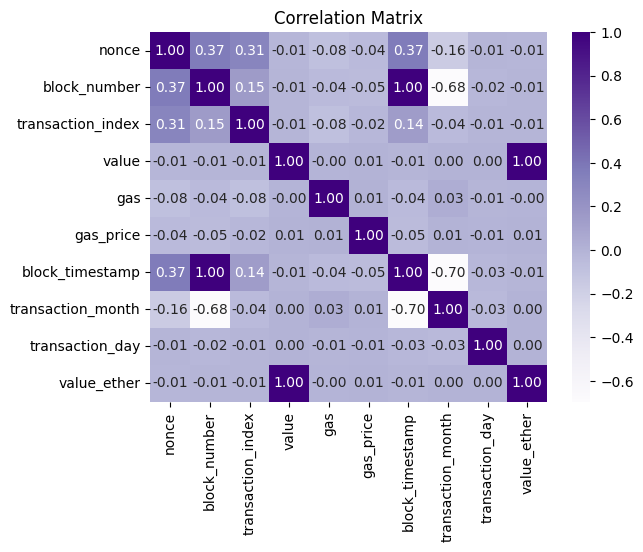

In [10]:
# Exploring feature correlations

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# If needed, drop any specific columns (like 'transaction_year', 'transaction_type') from the correlation matrix
columns_to_exclude = ['transaction_year', 'transaction_type']
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

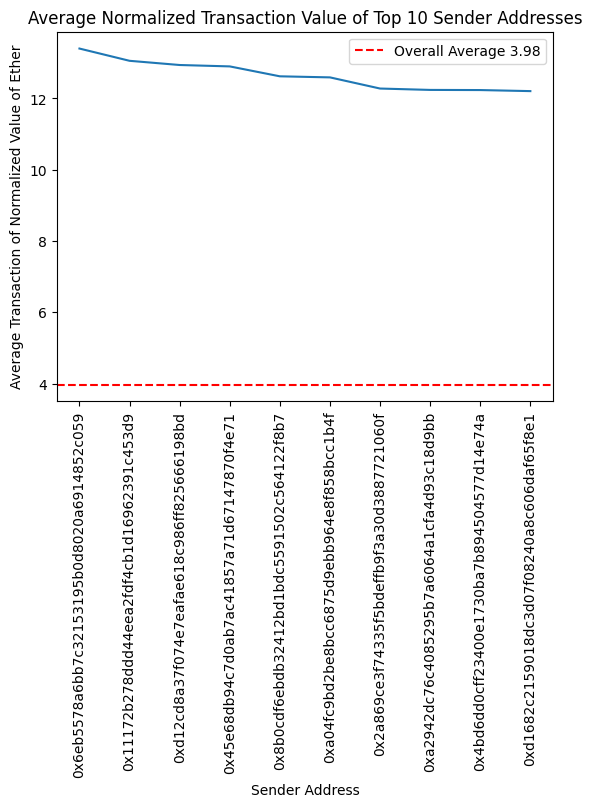

In [11]:
# Find the 10 senders with the highest average transaction value

senders = df.groupby('from_address')['value_ether'].mean().reset_index()
senders.columns = ['from_address', 'average_value_ether']
senders['log_av_value_ether'] = np.log1p(senders['average_value_ether'])
top_10_addresses = senders.sort_values(by='log_av_value_ether', ascending=False).head(10)

av_value = df['value_ether'].mean()
log_av_value = np.log1p(av_value)

plt.plot(top_10_addresses['from_address'], top_10_addresses['log_av_value_ether'])
plt.axhline(y=log_av_value, color='r', linestyle='--', label=f'Overall Average {log_av_value:.2f}')
plt.xlabel("Sender Address")
plt.ylabel("Average Transaction of Normalized Value of Ether")
plt.title("Average Normalized Transaction Value of Top 10 Sender Addresses")
plt.xticks(rotation=90)
plt.legend()
plt.show()

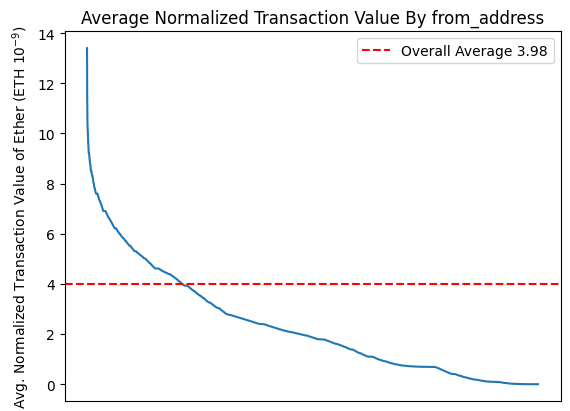

In [12]:
all_addresses = senders.sort_values(by='log_av_value_ether', ascending=False)

plt.plot(all_addresses['from_address'], all_addresses['log_av_value_ether'])
plt.axhline(y=log_av_value, color='r', linestyle='--', label=f'Overall Average {log_av_value:.2f}')
plt.ylabel("Avg. Normalized Transaction Value of Ether (ETH $10^{-9}$)")
plt.title("Average Normalized Transaction Value By from_address")
plt.xticks([])
plt.legend()
plt.show()

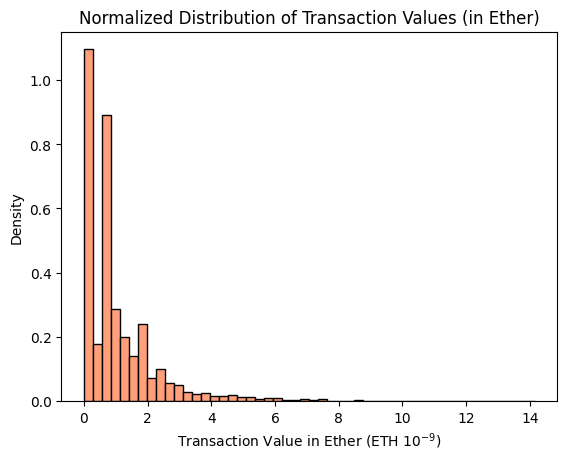

In [13]:
# Log normalization to reduce range impact
df['log_value_ether'] = np.log1p(df['value_ether'])

# Plot normalized distribution
df['log_value_ether'].plot(kind='hist', bins=50, density=True, color='LightSalmon', linewidth=1, edgecolor='black', title='Normalized Distribution of Transaction Values (in Ether)')
plt.xlabel('Transaction Value in Ether (ETH $10^{-9}$)')
plt.ylabel('Density')
plt.show()

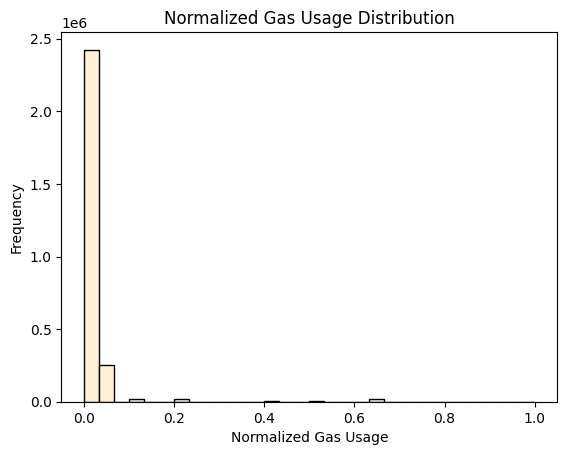

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['norm_gas'] = scaler.fit_transform(df[['gas']])

# Plot normalized gas usage
df['norm_gas'].plot(kind='hist', bins=30, color='PapayaWhip', linewidth=1, edgecolor='black', title='Normalized Gas Usage Distribution')
plt.xlabel('Normalized Gas Usage')
plt.show()

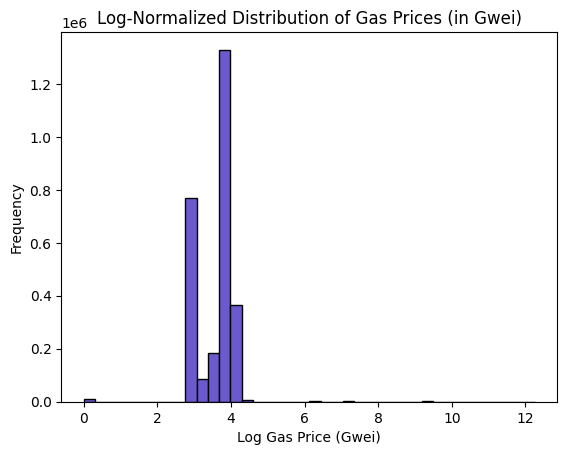

In [15]:
# Convert gas price from wei to gwei for easier interpretation
df['gas_price_gwei'] = df['gas_price'].astype(float) / 10**9

df['log_gas_price_gwei'] = np.log1p(df['gas_price_gwei'])

# Plot normalized gas prices
df['log_gas_price_gwei'].plot(kind='hist', bins=40, color='SlateBlue', linewidth=1, edgecolor='black', title='Log-Normalized Distribution of Gas Prices (in Gwei)')
plt.xlabel('Log Gas Price (Gwei)')
plt.show()


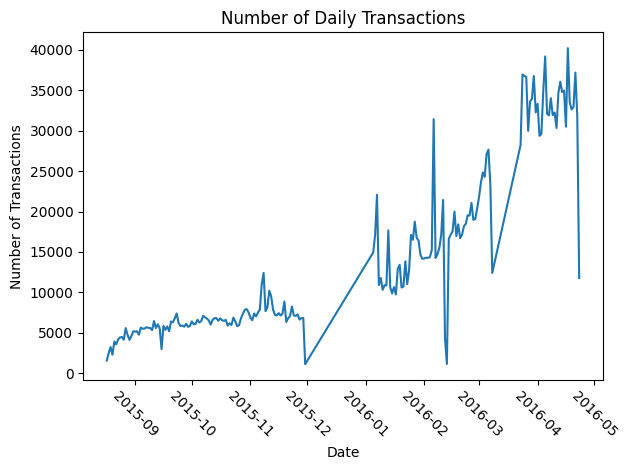

In [16]:
# Convert timestamp to datetime for better readability
df['datetime'] = pd.to_datetime(df['block_timestamp'], unit='s')

# Group by date and count transactions per day
transactions_per_day = df.groupby(df['datetime'].dt.date).size()

# Plot transactions over time with diagonal date labels
transactions_per_day.plot(title='Number of Daily Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=-45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

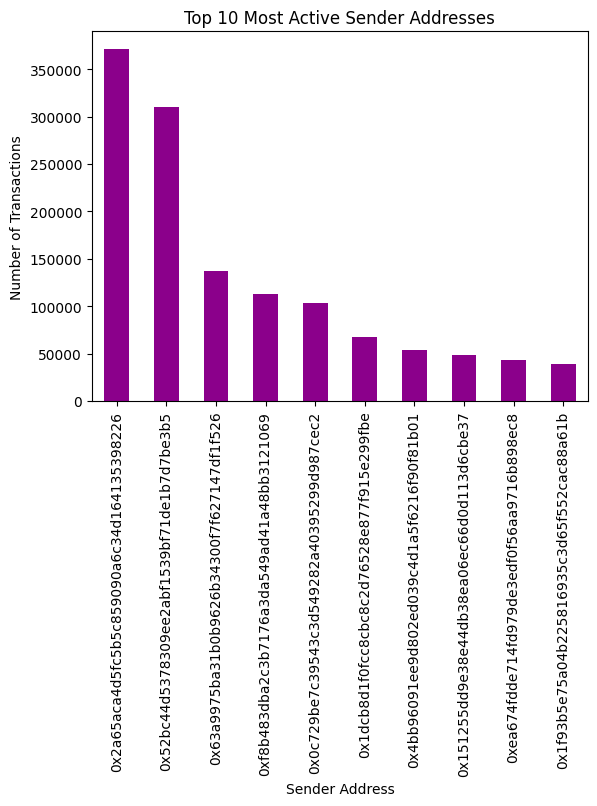

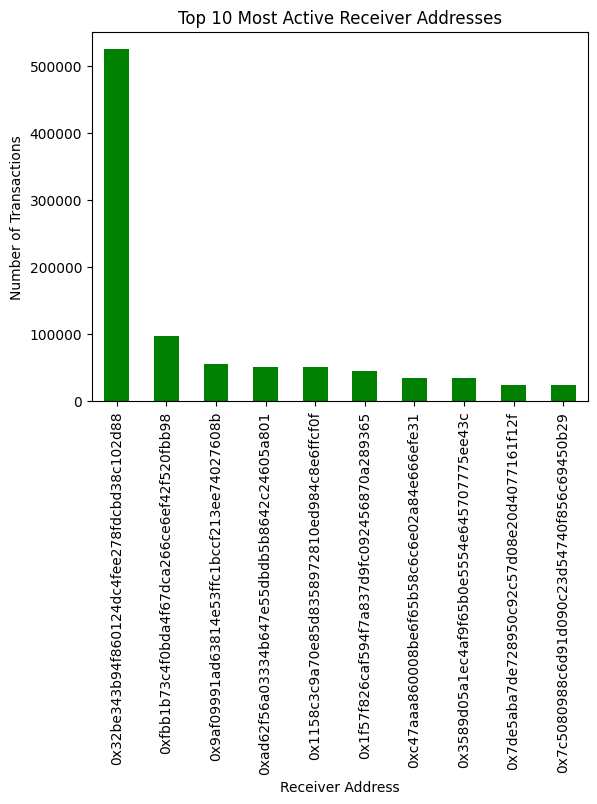

In [17]:
# Most active sender addresses
top_senders = df['from_address'].value_counts().head(10)
top_senders.plot(kind='bar', color='DarkMagenta', title='Top 10 Most Active Sender Addresses')
plt.xlabel('Sender Address')
plt.ylabel('Number of Transactions')
plt.show()

# Most active receiver addresses
top_receivers = df['to_address'].value_counts().head(10)
top_receivers.plot(kind='bar', color='green', title='Top 10 Most Active Receiver Addresses')
plt.xlabel('Receiver Address')
plt.ylabel('Number of Transactions')
plt.show()

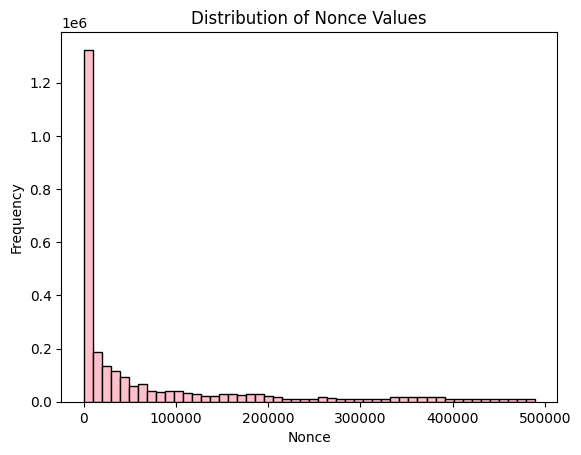

In [18]:
# Nonce distribution
# Nonce is a unique number that tracks the number of transactions sent from a given address. 
# Each Ethereum account has a nonce value that increases with each transaction the account sends

df['nonce'].plot(kind='hist', bins=50, color='pink', linewidth=1, edgecolor='black', title='Distribution of Nonce Values')
plt.xlabel('Nonce')
plt.show()


In [19]:
# Number of unique from and to addresses in dataset

unique_from_addresses = df['from_address'].nunique()
unique_to_addresses = df['to_address'].nunique()
print(f"Unique from_addresses: {unique_from_addresses}")
print(f"Unique to_addresses: {unique_to_addresses}")

Unique from_addresses: 74374
Unique to_addresses: 116225


## Milestone 3: Feature Engineering
[Return to Table of Contents](#table-of-contents)

### Frequency and Value of Transactions
Additional features that give us insights into the dataset and allow us to identify potentially fraudulent activity include information in regards to the frequency and values of transactions. 

The goal of these features was to give us metrics about each wallet address. 
- `from_frequency`: how many transactions were sent by this wallet address. 
- `to_frequency`: how many transactions were received by this wallet. 
- `total_frequency`: how active this wallet address is by telling us how many total transactions were processed by this wallet address. 
- `from_val_total` and `to_val_total`: the total amount of ETH sent and received from this wallet address, respectively. 
- `avg_value_sent` and `avg_value_received`:average value of each outgoing and incoming transaction. 

This information is useful for analyzing the behavior of each wallet address and provides data that helps us to generate statistical measures for the dataset as a whole. Using these metrics, we are able to generate an overall 'expected' behavior that can act as guidelines for flagging potentially fraudulent activity. In order to generate these statistics, it was important to filter out the values where the value sent or received was 0, as this shows the direction of the transaction (if the from value is zero, the to value is nonzero and vice versa).

Other features that we engineered pay attention to the gas price charged and gas used for transactions. Gas is a fee for executing these transactions in GWEI. In this dataset, gas refers to the number of gas units per transaction, and gas price is the amount of GWEI paid per unit of gas. Note that GWEI is $\frac{1}{10}^{18}$ ETH, and the features that we generated regarding gas price is converted to ETH. 

Intuitively, transactions with high gas might indicate fraud because when an individual sets a high gas fee that they are willing to pay, ensures that the transactions are prioritized and successful. Pump and dump schemes also often lead to spikes in gas fees. When executing transactions through a centralized exchange, the exchange includes the fees and gas considerations in the transaction fee, whereas executing transactions through the Ethereum network directly allows the user to set the gas fee. It would make sense intuitively that transactions that occur over the Ethereum network directly are more likely to be fraudulent than transactions that occur through a centralized exchange. 

#### ?? Include/exclude? IDK: 
We created an additional dataframe to reduce the dimensions to these particular metrics, allowing for further exploration of the behavior for each wallet address.

### Interesting notes:

- The maximum average value sent from a single wallet is 935800.0ETH. The price of ETH during between 8/17/2015-9/13/2015 was between 0.87 and 1.35USD, therefore, 935800.0ETH during this time period was 814,146 - 1,263,330USD. (source:   https://coinmarketcap.com/currencies/ethereum/historical-data/) This wallet could have only transaction that contributed to this average, however, this is likely an outlier, since 75% of the data has average sent values of 126.652167ETH or less. Since this value is far from the mean and most other data points, it could help be analyzed in more detail in order to identify if it could be fraudulent.
- The three wallet addresses that are displayed in the first 3 indices of the new dataframe have interesting values. First, the actual wallet addresses are interesting and represent potentially "placeholder" or testing wallets. The first wallet only received ETH, with the average value of each transaction it received being about 2ETH or somewhere between about  \$1.74 to \$2.70 USD. The other two top wallet addresses processed fewer transactions with even smaller amounts. It is important to keep in mind the time period that this dataset represents. Currently, our data includes transactions between 8/17/2015 and 9/13/2015.
- The gas price for sent and received transactions are very similar, however, the amount of gas units used to send transactions is higher than the amount of gas used when receiving transactions. This could be due to computational complexity lying on the wallet that initiates the transaction.


In [20]:
# Create new features based on frequency and value of transactions
from_frequency = df['from_address'].value_counts()
to_frequency = df['to_address'].value_counts()

# Create new features based on total value of transactions
from_val_total = df.groupby('from_address')['value_ether'].sum()
to_val_total = df.groupby('to_address')['value_ether'].sum()

# Create new dataframe with frequency and value features
transaction_freq = pd.DataFrame({
    'from_frequency': from_frequency,
    'to_frequency': to_frequency,
    'from_val_total': from_val_total,
    'to_val_total': to_val_total
}).fillna(0)

# Create new feature for total frequency of transactions
transaction_freq['total_frequency'] = transaction_freq['from_frequency'] + transaction_freq['to_frequency']
transaction_freq['avg_value_sent'] = (transaction_freq['from_val_total'] / transaction_freq['from_frequency']).fillna(0)
transaction_freq['avg_value_received'] = (transaction_freq['to_val_total'] / transaction_freq['to_frequency']).fillna(0)

# Generating statistic metrics for dataset excluding values of 0:

print("Metrics for average value sent across full dataset, excluding sent values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_value_sent'] != 0]
mean_avg_sent = filtered_df['avg_value_sent'].mean() # average value sent for entire dataset
quantiles_avg_sent25 = filtered_df['avg_value_sent'].quantile(0.25)
quantiles_avg_sent50 = filtered_df['avg_value_sent'].quantile(0.50)
quantiles_avg_sent75 = filtered_df['avg_value_sent'].quantile(0.75)
avg_value_sent_min = filtered_df['avg_value_sent'].min()
avg_value_sent_max = filtered_df['avg_value_sent'].max()

print(f"Mean avg_value_sent: {mean_avg_sent}")
print(f"Quartiles of avg_value_sent:\n25%: {quantiles_avg_sent25}\n50%: {quantiles_avg_sent50}\n75%: {quantiles_avg_sent75}")
print(f"Min avg_value_sent: {avg_value_sent_min}")
print(f"Max avg_value_sent: {avg_value_sent_max}")

Metrics for average value sent across full dataset, excluding sent values of 0:
Mean avg_value_sent: 311.2265337813201
Quartiles of avg_value_sent:
25%: 1.01156746
50%: 5.806018625
75%: 35.31544235
Min avg_value_sent: 5e-19
Max avg_value_sent: 659999.0


In [21]:
print("\nMetrics for average value received across full dataset, excluding received values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_value_received'] != 0]
mean_avg_received = filtered_df['avg_value_received'].mean()
quantiles_avg_received25 = filtered_df['avg_value_received'].quantile(0.25)
quantiles_avg_received50 = filtered_df['avg_value_received'].quantile(0.50)
quantiles_avg_received75 = filtered_df['avg_value_received'].quantile(0.75)
avg_value_rec_min = filtered_df['avg_value_received'].min()
avg_value_rec_max = filtered_df['avg_value_received'].max()

print(f"Mean avg_value_received: {mean_avg_received}")
print(f"Quartiles of avg_value_received:\n25%: {quantiles_avg_received25}\n50%: {quantiles_avg_received50}\n75%: {quantiles_avg_received75}")
print(f"Min avg_value_received: {avg_value_rec_min}")
print(f"Max avg_value_received: {avg_value_rec_max}")

# Generate average transaction frequencies
print("\n")
print("Average number of transactions sent: ", transaction_freq['from_frequency'].mean())
print("Average number of transactions received: ", transaction_freq['to_frequency'].mean())

# Create new features based on total gas for transactions
transaction_freq['from_gas_total'] = df.groupby('from_address')['gas'].sum()
transaction_freq['to_gas_total'] = df.groupby('to_address')['gas'].sum()

# Create new features for gas
transaction_freq['avg_gas_sent'] = df.groupby('from_address')['gas'].mean()
transaction_freq['avg_gas_price_sent'] = df.groupby('from_address')['gas_price'].mean() / (10**18) # converts GWEI to ETH
transaction_freq['avg_gas_received'] = df.groupby('to_address')['gas'].mean()
transaction_freq['avg_gas_price_received'] = df.groupby('to_address')['gas_price'].mean() / (10**18) # converts GWEI to ETH

transaction_freq.fillna(0, inplace=True)


Metrics for average value received across full dataset, excluding received values of 0:
Mean avg_value_received: 187.26743006145452
Quartiles of avg_value_received:
25%: 0.16
50%: 1.7573167023033016
75%: 15.106707499999999
Min avg_value_received: 7.894736842105263e-20
Max avg_value_received: 500000.0


Average number of transactions sent:  22.589468164425764
Average number of transactions received:  22.463043531696286


In [22]:
print("\nMetrics for average gas price sent across full dataset, excluding sent values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_gas_price_sent'] != 0]
mean_avg_gasprice_sent = filtered_df['avg_gas_price_sent'].mean()
quantiles_avg_gasprice_sent25 = filtered_df['avg_gas_price_sent'].quantile(0.25)
quantiles_avg_gasprice_sent50 = filtered_df['avg_gas_price_sent'].quantile(0.50)
quantiles_avg_gasprice_sent75 = filtered_df['avg_gas_price_sent'].quantile(0.75)
avg_gasprice_sent_min = filtered_df['avg_gas_price_sent'].min()
avg_gasprice_sent_max = filtered_df['avg_gas_price_sent'].max()

print(f"Mean average gas_price sent: {mean_avg_gasprice_sent}")
print(f"Quartiles of avg_gasprice_sent:\n25%: {quantiles_avg_gasprice_sent25}\n50%: {quantiles_avg_gasprice_sent50}\n75%: {quantiles_avg_gasprice_sent75}")
print(f"Min avg_gasprice_sent: {avg_gasprice_sent_min}")
print(f"Max avg_gasprice_sent: {avg_gasprice_sent_max}")


Metrics for average gas price sent across full dataset, excluding sent values of 0:
Mean average gas_price sent: 6.991212282522418e-08
Quartiles of avg_gasprice_sent:
25%: 2e-08
50%: 5e-08
75%: 5e-08
Min avg_gasprice_sent: 1.62092132305e-08
Max avg_gasprice_sent: 5.251575e-05


In [23]:
print("\nMetrics for average gas price received across full dataset, excluding received values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_gas_price_received'] != 0]
mean_avg_gasprice_received = filtered_df['avg_gas_price_received'].mean()
quantiles_avg_gasprice_received25 = filtered_df['avg_gas_price_received'].quantile(0.25)
quantiles_avg_gasprice_received50 = filtered_df['avg_gas_price_received'].quantile(0.50)
quantiles_avg_gasprice_received75 = filtered_df['avg_gas_price_received'].quantile(0.75)
avg_gasprice_rec_min = filtered_df['avg_gas_price_received'].min()
avg_gasprice_rec_max = filtered_df['avg_gas_price_received'].max()

print(f"Mean average gas_price received: {mean_avg_gasprice_received}")
print(f"Quartiles of avg_gasprice_received:\n25%: {quantiles_avg_gasprice_received25}\n50%: {quantiles_avg_gasprice_received50}\n75%: {quantiles_avg_gasprice_received75}")
print(f"Min avg_value_sent: {avg_gasprice_rec_min}")
print(f"Max avg_value_sent: {avg_gasprice_rec_max}")


Metrics for average gas price received across full dataset, excluding received values of 0:
Mean average gas_price received: 5.731711453984889e-08
Quartiles of avg_gasprice_received:
25%: 2.011896104425e-08
50%: 5e-08
75%: 5e-08
Min avg_value_sent: 1e-17
Max avg_value_sent: 5.251575e-05


In [24]:
# Generate average gas prices

filtered_df = transaction_freq[transaction_freq['avg_gas_sent'] != 0]
mean_avg_gas_sent = filtered_df['avg_gas_sent'].mean()

filtered_df = transaction_freq[transaction_freq['avg_gas_received'] != 0]
mean_avg_gas_received = filtered_df['avg_gas_received'].mean()

print("Average gas price for sent transactions: ", mean_avg_gasprice_sent)
print("Average gas used for sent transactions: ", mean_avg_gas_sent)

print("Average gas price for received transactions: ", mean_avg_gasprice_received)
print("Average gas used for received transactions: ", mean_avg_gas_received)

Average gas price for sent transactions:  6.991212282522418e-08
Average gas used for sent transactions:  103858.32725952686
Average gas price for received transactions:  5.731711453984889e-08
Average gas used for received transactions:  113073.2645037465


In [25]:
# Print the resulting dataframes sorted by transaction type

# Top wallets highest sender frequency
transaction_freq.sort_values('from_frequency', ascending=False, inplace=True)
transaction_freq.head(10)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0x2a65aca4d5fc5b5c859090a6c34d164135398226,371299.0,1.0,1.115021e+06,20.000000,371300.0,3.003026e+00,20.000000,3.341691e+10,90000.0,90000.000000,3.773797e-08,90000.000000,5.000000e-08
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,310093.0,47.0,1.096730e+06,226.597975,310140.0,3.536778e+00,4.821234,1.214644e+10,1521000.0,39170.297298,3.793957e-08,32361.702128,6.890291e-08
0x63a9975ba31b0b9626b34300f7f627147df1f526,136754.0,28.0,2.228501e+05,4533.710000,136782.0,1.629569e+00,161.918214,1.230786e+10,2520000.0,90000.000000,3.756073e-08,90000.000000,5.029621e-08
0xf8b483dba2c3b7176a3da549ad41a48bb3121069,112713.0,8.0,5.061309e+05,193.117000,112721.0,4.490440e+00,24.139625,1.014417e+10,720000.0,90000.000000,3.827310e-08,90000.000000,2.000000e-08
0x0c729be7c39543c3d549282a40395299d987cec2,103806.0,14.0,5.973525e+04,45009.052938,103820.0,5.754508e-01,3214.932353,9.342540e+09,722000.0,90000.000000,3.151791e-08,51571.428571,2.785714e-08
0x1dcb8d1f0fcc8cbc8c2d76528e877f915e299fbe,67577.0,0.0,2.146266e+05,0.000000,67577.0,3.176031e+00,0.000000,6.081930e+09,0.0,90000.000000,5.004695e-08,0.000000,0.000000e+00
0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,53769.0,4.0,2.673935e+05,7.231721,53773.0,4.973004e+00,1.807930,3.515346e+09,295000.0,65378.675445,6.176205e-08,73750.000000,2.259603e-08
0x151255dd9e38e44db38ea06ec66d0d113d6cbe37,48258.0,0.0,1.152228e+05,0.000000,48258.0,2.387642e+00,0.000000,4.343220e+09,0.0,90000.000000,2.059613e-08,0.000000,0.000000e+00
0xea674fdde714fd979de3edf0f56aa9716b898ec8,43238.0,0.0,4.687348e+04,0.000000,43238.0,1.084081e+00,0.000000,3.891012e+09,0.0,89990.563856,2.014235e-08,0.000000,0.000000e+00
0x1f93b5e75a04b225816935c3d65f552cac88a61b,38734.0,4.0,3.873400e-14,194.000000,38738.0,1.000000e-18,48.500000,9.683500e+09,1000000.0,250000.000000,3.468395e-08,250000.000000,4.250000e-08


In [26]:
# Top wallets highest receiver frequency
transaction_freq.sort_values('to_frequency', ascending=False, inplace=True)
transaction_freq.head(10)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0x32be343b94f860124dc4fee278fdcbd38c102d88,32599.0,524979.0,2.607735e+07,2.589535e+07,557578.0,799.943400,4.932644e+01,3.344510e+09,1.102613e+10,102595.476364,4.861886e-08,21002.988691,4.846665e-08
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,8188.0,98199.0,1.432468e+06,1.657977e+06,106387.0,174.947264,1.688385e+01,1.806462e+08,2.152870e+09,22062.314851,3.885683e-08,21923.541340,3.681353e-08
0x9af09991ad63814e53ffc1bccf213ee74027608b,0.0,55127.0,0.000000e+00,5.511800e-14,55127.0,0.000000,9.998367e-19,0.000000e+00,1.541630e+10,0.000000,0.000000e+00,279650.624921,5.199967e-08
0xad62f56a03334b647e55dbdb5b8642c24605a801,0.0,51172.0,0.000000e+00,5.117200e-14,51172.0,0.000000,1.000000e-18,0.000000e+00,1.340820e+10,0.000000,0.000000e+00,262022.199640,2.000000e-08
0x1158c3c9a70e85d8358972810ed984c8e6ffcf0f,0.0,50931.0,0.000000e+00,0.000000e+00,50931.0,0.000000,0.000000e+00,0.000000e+00,5.538530e+09,0.000000,0.000000e+00,108745.754059,9.663994e-08
0x1f57f826caf594f7a837d9fc092456870a289365,5671.0,45058.0,2.230479e+04,2.231399e+04,50729.0,3.933132,4.952281e-01,1.250372e+08,4.055220e+09,22048.518780,2.943493e-08,90000.000000,2.420246e-08
0xc47aaa860008be6f65b58c6c6e02a84e666efe31,3049.0,35013.0,8.426200e+05,7.471271e+05,38062.0,276.359478,2.133856e+01,2.744100e+08,7.362390e+08,90000.000000,5.031477e-08,21027.589752,5.000034e-08
0x3589d05a1ec4af9f65b0e5554e645707775ee43c,0.0,34118.0,0.000000e+00,1.211000e+02,34118.0,0.000000,3.549446e-03,0.000000e+00,6.822460e+09,0.000000,0.000000e+00,199966.586553,5.142605e-08
0x7de5aba7de728950c92c57d08e20d4077161f12f,0.0,24464.0,0.000000e+00,2.446400e-14,24464.0,0.000000,1.000000e-18,0.000000e+00,7.262800e+09,0.000000,0.000000e+00,296877.043819,5.200065e-08
0x7c5080988c6d91d090c23d54740f856c69450b29,8138.0,24020.0,1.002276e+03,1.011641e+03,32158.0,0.123160,4.211661e-02,1.708980e+08,2.161800e+09,21000.000000,5.079168e-08,90000.000000,5.004984e-08


In [27]:
# Top wallets by total transactions
transaction_freq.sort_values('total_frequency', ascending=False, inplace=True)
transaction_freq.head(10)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0x32be343b94f860124dc4fee278fdcbd38c102d88,32599.0,524979.0,2.607735e+07,2.589535e+07,557578.0,799.943400,4.932644e+01,3.344510e+09,1.102613e+10,102595.476364,4.861886e-08,21002.988691,4.846665e-08
0x2a65aca4d5fc5b5c859090a6c34d164135398226,371299.0,1.0,1.115021e+06,2.000000e+01,371300.0,3.003026,2.000000e+01,3.341691e+10,9.000000e+04,90000.000000,3.773797e-08,90000.000000,5.000000e-08
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,310093.0,47.0,1.096730e+06,2.265980e+02,310140.0,3.536778,4.821234e+00,1.214644e+10,1.521000e+06,39170.297298,3.793957e-08,32361.702128,6.890291e-08
0x63a9975ba31b0b9626b34300f7f627147df1f526,136754.0,28.0,2.228501e+05,4.533710e+03,136782.0,1.629569,1.619182e+02,1.230786e+10,2.520000e+06,90000.000000,3.756073e-08,90000.000000,5.029621e-08
0xf8b483dba2c3b7176a3da549ad41a48bb3121069,112713.0,8.0,5.061309e+05,1.931170e+02,112721.0,4.490440,2.413962e+01,1.014417e+10,7.200000e+05,90000.000000,3.827310e-08,90000.000000,2.000000e-08
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,8188.0,98199.0,1.432468e+06,1.657977e+06,106387.0,174.947264,1.688385e+01,1.806462e+08,2.152870e+09,22062.314851,3.885683e-08,21923.541340,3.681353e-08
0x0c729be7c39543c3d549282a40395299d987cec2,103806.0,14.0,5.973525e+04,4.500905e+04,103820.0,0.575451,3.214932e+03,9.342540e+09,7.220000e+05,90000.000000,3.151791e-08,51571.428571,2.785714e-08
0x1dcb8d1f0fcc8cbc8c2d76528e877f915e299fbe,67577.0,0.0,2.146266e+05,0.000000e+00,67577.0,3.176031,0.000000e+00,6.081930e+09,0.000000e+00,90000.000000,5.004695e-08,0.000000,0.000000e+00
0x9af09991ad63814e53ffc1bccf213ee74027608b,0.0,55127.0,0.000000e+00,5.511800e-14,55127.0,0.000000,9.998367e-19,0.000000e+00,1.541630e+10,0.000000,0.000000e+00,279650.624921,5.199967e-08
0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,53769.0,4.0,2.673935e+05,7.231721e+00,53773.0,4.973004,1.807930e+00,3.515346e+09,2.950000e+05,65378.675445,6.176205e-08,73750.000000,2.259603e-08


### Distinct Counterparties

In order to explore the most prominent wallets addresses from this time period, we engineered several features regarding distinct counterparties. We identified which wallet addresses are involved in transactions together. We generated a new dataframe with a `from_unique` feature that identifies the number of wallet addresses that each wallet sends transactions to and the `to_unique` feature counts the number of wallets that each wallet receives transactions from. 

We explored the 10 wallet addresses that send transactions to the highest number of distinct wallet addresses as well as the 10 wallet addresses that receive transactions from the most wallet addresses. These could help us to identify businesses or potentially to classify and characterize wallet types. By exploring which wallets frequently make transactions with themselves, we could generate a baseline for expected self transaction behavior.

In [28]:
# distinct counterparties

from_unique = df.groupby('from_address')['to_address'].nunique()
to_unique = df.groupby('to_address')['from_address'].nunique()

distinct_counterparties = pd.DataFrame({
    'from_unique': from_unique,
    'to_unique': to_unique
}).fillna(0)

In [29]:
# distinct top 10 senders
top10senders = distinct_counterparties.sort_values(by='to_unique', ascending=False).head(10)

top10senders

,from_unique,to_unique
0x32be343b94f860124dc4fee278fdcbd38c102d88,11163.0,12390.0
0x120a270bbc009644e35f0bb6ab13f95b8199c4ad,9642.0,10495.0
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,3314.0,2772.0
0x2910543af39aba0cd09dbb2d50200b3e800a63d2,5858.0,1553.0
0xc47aaa860008be6f65b58c6c6e02a84e666efe31,1313.0,1247.0
0xed6b25b3b2dab2d5d96ac659aabbf812f069351b,497.0,953.0
0x9b0a028eafdecde3afc0fd00b7937098388b7c8a,591.0,773.0
0x1365cef2f79c0ac0e60f05f10f9422527acb47d8,2.0,654.0
0xf0160428a8552ac9bb7e050d90eeade4ddd52843,0.0,653.0
0x353765840d98943d116912997e3039afb16a0ea5,1.0,637.0


In [30]:
# distinct top 10 receivers
top10receivers = distinct_counterparties.sort_values(by='from_unique', ascending=False).head(10)

top10receivers

,from_unique,to_unique
0x32be343b94f860124dc4fee278fdcbd38c102d88,11163.0,12390.0
0x120a270bbc009644e35f0bb6ab13f95b8199c4ad,9642.0,10495.0
0x2a65aca4d5fc5b5c859090a6c34d164135398226,7027.0,1.0
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,6321.0,3.0
0x2910543af39aba0cd09dbb2d50200b3e800a63d2,5858.0,1553.0
0x1c10a5aabc2555ee3027d5758c4b7b462605f972,5286.0,8.0
0x151255dd9e38e44db38ea06ec66d0d113d6cbe37,5072.0,0.0
0x09197b95a57ad20ee68b53e0843fb1d218db6a78,4489.0,4.0
0x0c729be7c39543c3d549282a40395299d987cec2,4027.0,4.0
0x63a9975ba31b0b9626b34300f7f627147df1f526,3724.0,5.0


In [31]:
# self_transactions

# TODO: loop back around to transaction_type that we dropped earlier. in other dataset windows, we may 
# be able to get a value other than 0 which may be useful here.

self_transactions = df[df['from_address'] == df['to_address']]

# Create the DataFrame with the required aggregations
wallet_summary = self_transactions.groupby('from_address').agg(
    number_self_transactions=('from_address', 'size'),
    average_gas_used=('gas', 'mean'),
    average_gas_price=('gas_price', 'mean'),
    average_value_ether=('value_ether', 'mean'),
    first_nonce=('nonce', 'first')
).reset_index()

# Display the resulting DataFrame
wallet_summary.sort_values('number_self_transactions', ascending=False, inplace=True)
wallet_summary.head(10)

,from_address,number_self_transactions,average_gas_used,average_gas_price,average_value_ether,first_nonce
390,0xf0f7e8b1c9f5a5deae033e33b6ba22bdab3f61c3,1895,2.000000e+06,5.000000e+10,1.022639e-02,0
23,0x0c5437b0b6906321cca17af681d59baf60afe7d6,1245,9.000000e+04,5.016017e+10,1.909359e+03,8
13,0x082d4cdf07f386ffa9258f52a5c49db4ac321ec6,94,9.000000e+04,5.000000e+10,1.000000e-18,0
133,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,44,3.068182e+04,7.019174e+10,5.815449e-01,227
52,0x1c10a5aabc2555ee3027d5758c4b7b462605f972,42,2.100000e+04,5.006788e+10,2.559190e-03,58
4,0x00705a7d455de53ccf798e81912283709dafa0ca,20,9.000000e+04,2.099116e+10,1.000000e-01,7
107,0x3c770607ee15cffef99672722845b0c397130abd,13,2.500000e+04,5.392144e+10,1.015385e+00,2
59,0x20f9bb9dfd0c18748debe6c534b13cb24f8dfd2d,10,2.600000e+04,3.800000e+10,3.340030e-02,1
313,0xbac369f138d479abd45340e7735f80617a008ee7,9,2.200000e+04,5.000000e+10,2.026707e-01,4
264,0xa2a4710d4e0f76f500582eebee7ebfe0ea57a1e4,8,9.387500e+04,4.943182e+10,1.250000e-03,7


## Milestone 5: Anomaly Detection
[Return to Table of Contents](#table-of-contents)

Our anomaly detection for this data set primarily involves identifying outliers. Transactions that fall outside of the typical range of value and gas could indicate suspicious activity. 

In [32]:
# statistic metrics calculated in feature engineering - pasted here for reference, generated bounds for expected values

# Plot 1
# mean_avg_sent
# quantiles_avg_sent25
# quantiles_avg_sent50 
# quantiles_avg_sent75 
sentIQR = quantiles_avg_sent75 - quantiles_avg_sent25
sent_lower_bound = quantiles_avg_sent25 - (1.5 * sentIQR)
sent_upper_bound = quantiles_avg_sent75 + (1.5 * sentIQR)

# Plot 2
# mean_avg_received
# quantiles_avg_received25
# quantiles_avg_received50
# quantiles_avg_received75
recIQR = quantiles_avg_received75 - quantiles_avg_received25
rec_lower_bound = quantiles_avg_received25 - (1.5 * recIQR)
rec_upper_bound = quantiles_avg_received75 + (1.5 * recIQR)

# Plot 3
# mean_avg_gas_sent

# Plot 4
# mean_avg_gasprice_sent
# quantiles_avg_gasprice_sent25
# quantiles_avg_gasprice_sent50
# quantiles_avg_gasprice_sent75
gasprice_sentIQR = quantiles_avg_gasprice_sent75 - quantiles_avg_gasprice_sent25
gasprice_sent_lower_bound = quantiles_avg_gasprice_sent25 - (1.5 * gasprice_sentIQR)
gasprice_sent_upper_bound = quantiles_avg_gasprice_sent75 + (1.5 * gasprice_sentIQR)

# Plot 5
# mean_avg_gas_received

# Plot 6
# mean_avg_gasprice_received
# quantiles_avg_gasprice_received25
# quantiles_avg_gasprice_received50
# quantiles_avg_gasprice_received75
gasprice_recIQR = quantiles_avg_gasprice_received75 - quantiles_avg_gasprice_received25
gasprice_rec_lower_bound = quantiles_avg_gasprice_received25 - (1.5 * gasprice_recIQR)
gasprice_rec_upper_bound = quantiles_avg_gasprice_received75 + (1.5 * gasprice_recIQR)


In [33]:
# x and y arrays for plots

wallets = transaction_freq.index
sent_values = transaction_freq['avg_value_sent']
rec_values = transaction_freq['avg_value_received']
gassent_values = transaction_freq['avg_gas_sent']
gasprice_sent = transaction_freq['avg_gas_price_sent']
gasrec_values = transaction_freq['avg_gas_received']
gasprice_rec = transaction_freq['avg_gas_price_received']

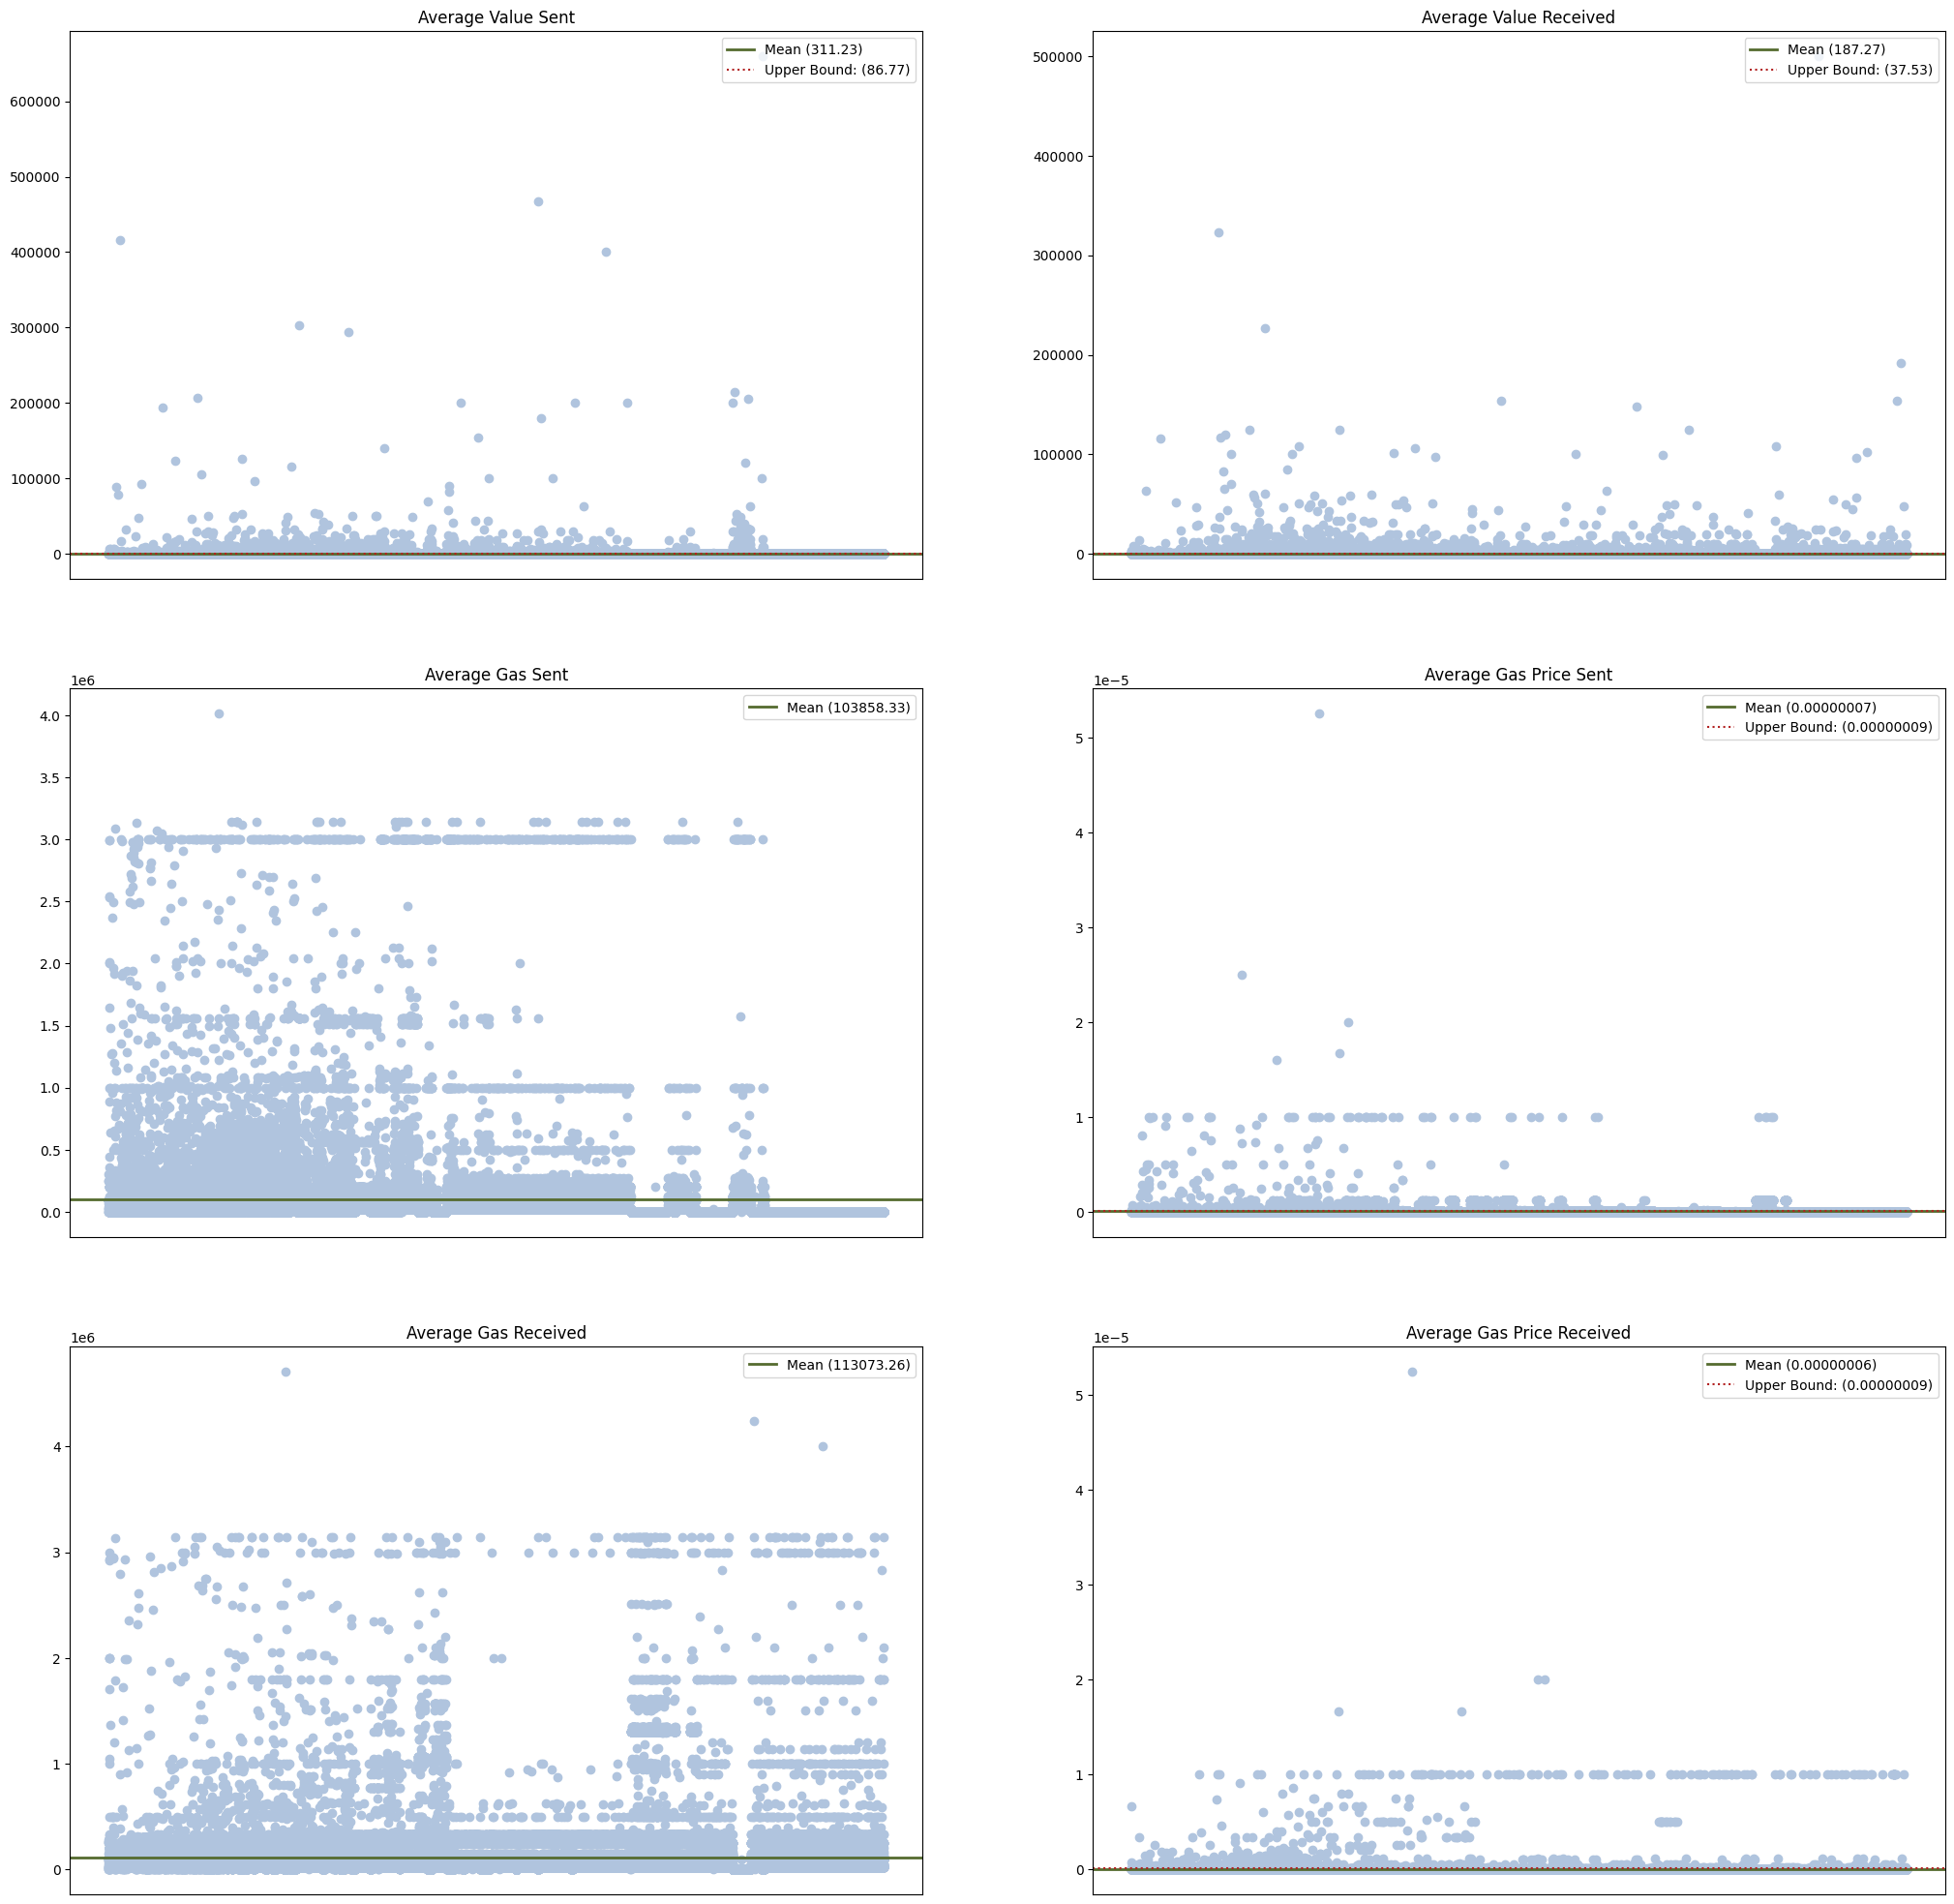

In [34]:
# Generate plots of values: 
fig, axs = plt.subplots(3, 2, figsize=(25, 25))

# Plot on the first subplot
axs[0][0].scatter(wallets, sent_values, color="lightsteelblue")
axs[0][0].axhline(y=mean_avg_sent, color='darkolivegreen', linestyle='solid', lw=2, label=f'Mean ({mean_avg_sent:.2f})')
axs[0][0].axhline(y=sent_upper_bound, color='firebrick', linestyle='dotted', label=f'Upper Bound: ({sent_upper_bound:.2f})')
axs[0][0].set_title('Average Value Sent')

# Plot on the second subplot
axs[0][1].scatter(wallets, rec_values, color="lightsteelblue")
axs[0][1].axhline(y=mean_avg_received, color='darkolivegreen', linestyle='solid', lw=2, label=f'Mean ({mean_avg_received:.2f})')
axs[0][1].axhline(y=rec_upper_bound, color='firebrick', linestyle='dotted', label=f'Upper Bound: ({rec_upper_bound:.2f})')
axs[0][1].set_title('Average Value Received')

axs[1][0].scatter(wallets, gassent_values, color="lightsteelblue")
axs[1][0].axhline(y=mean_avg_gas_sent, color='darkolivegreen', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gas_sent:.2f})')
axs[1][0].set_title('Average Gas Sent')

axs[1][1].scatter(wallets, gasprice_sent, color="lightsteelblue")
axs[1][1].axhline(y=mean_avg_gasprice_sent, color='darkolivegreen', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gasprice_sent:.8f})')
axs[1][1].axhline(y=gasprice_sent_upper_bound, color='firebrick', linestyle='dotted', label=f'Upper Bound: ({gasprice_sent_upper_bound:.8f})')
axs[1][1].set_title('Average Gas Price Sent')

axs[2][0].scatter(wallets, gasrec_values, color="lightsteelblue")
axs[2][0].axhline(y=mean_avg_gas_received, color='darkolivegreen', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gas_received:.2f})')
axs[2][0].set_title('Average Gas Received')

axs[2][1].scatter(wallets, gasprice_rec, color="lightsteelblue")
axs[2][1].axhline(y=mean_avg_gasprice_received, color='darkolivegreen', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gasprice_received:.8f})')
axs[2][1].axhline(y=gasprice_rec_upper_bound, color='firebrick', linestyle='dotted', label=f'Upper Bound: ({gasprice_rec_upper_bound:.8f})')
axs[2][1].set_title('Average Gas Price Received')

for row in range(3):
    for col in range(2):
        axs[row][col].set_xticks([])
        axs[row][col].legend(loc='upper right')
                     
plt.show()

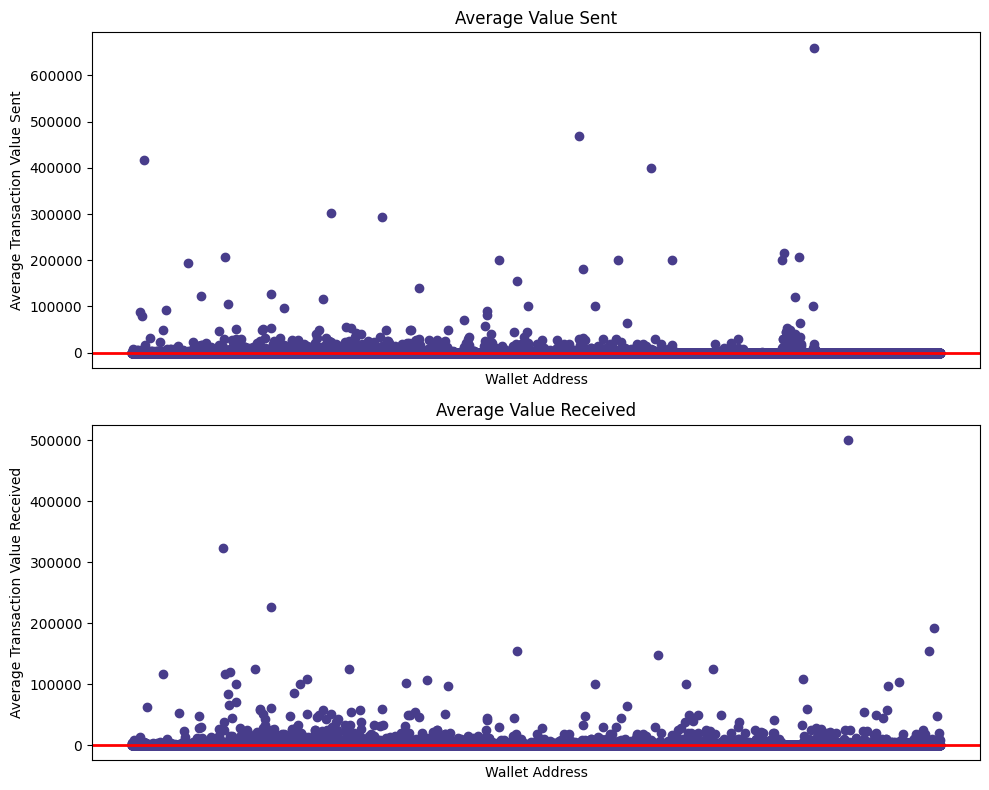

In [35]:
# THESE ARE FOR VISUALIZATIONS FOR THE FINAL REPORT

# VALUE PLOTS
# Generate plots of values : 
fig, axs = plt.subplots(2, 1, figsize=(10,8))
# Plot on the first subplot
axs[0].scatter(wallets, sent_values, color="darkslateblue")
axs[0].axhline(y=mean_avg_sent, color='r', linestyle='solid', lw=2, label=f'Mean ({mean_avg_sent:.2f})')
axs[0].set_title('Average Value Sent')
axs[0].set_xlabel('Wallet Address')
axs[0].set_ylabel('Average Transaction Value Sent')
axs[0].set_xticks([])


# Plot on the second subplot
axs[1].scatter(wallets, rec_values, color="darkslateblue")
axs[1].axhline(y=mean_avg_received, color='r', linestyle='solid', lw=2, label=f'Mean ({mean_avg_received:.2f})')
axs[1].set_title('Average Value Received')
axs[1].set_xlabel('Wallet Address')
axs[1].set_ylabel('Average Transaction Value Received')
axs[1].set_xticks([])

plt.tight_layout()                  
plt.show()

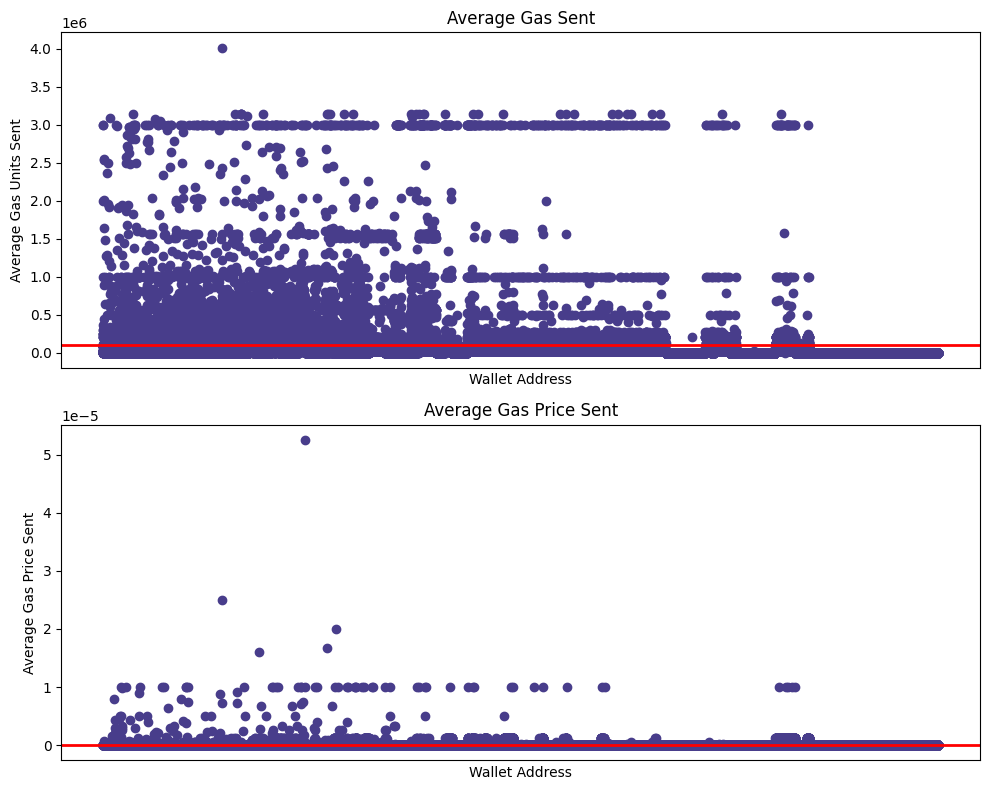

In [36]:
# SENT GAS PLOTS
# Generate plots of values : 
fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].scatter(wallets, gassent_values, color="darkslateblue")
axs[0].axhline(y=mean_avg_gas_sent, color='r', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gas_sent:.2f})')
axs[0].set_title('Average Gas Sent')
axs[0].set_xlabel('Wallet Address')
axs[0].set_ylabel('Average Gas Units Sent')
axs[0].set_xticks([])

axs[1].scatter(wallets, gasprice_sent, color="darkslateblue")
axs[1].axhline(y=mean_avg_gasprice_sent, color='r', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gasprice_sent:.8f})')
axs[1].set_title('Average Gas Price Sent')
axs[1].set_xlabel('Wallet Address')
axs[1].set_ylabel('Average Gas Price Sent')
axs[1].set_xticks([])

plt.tight_layout() 
plt.show()

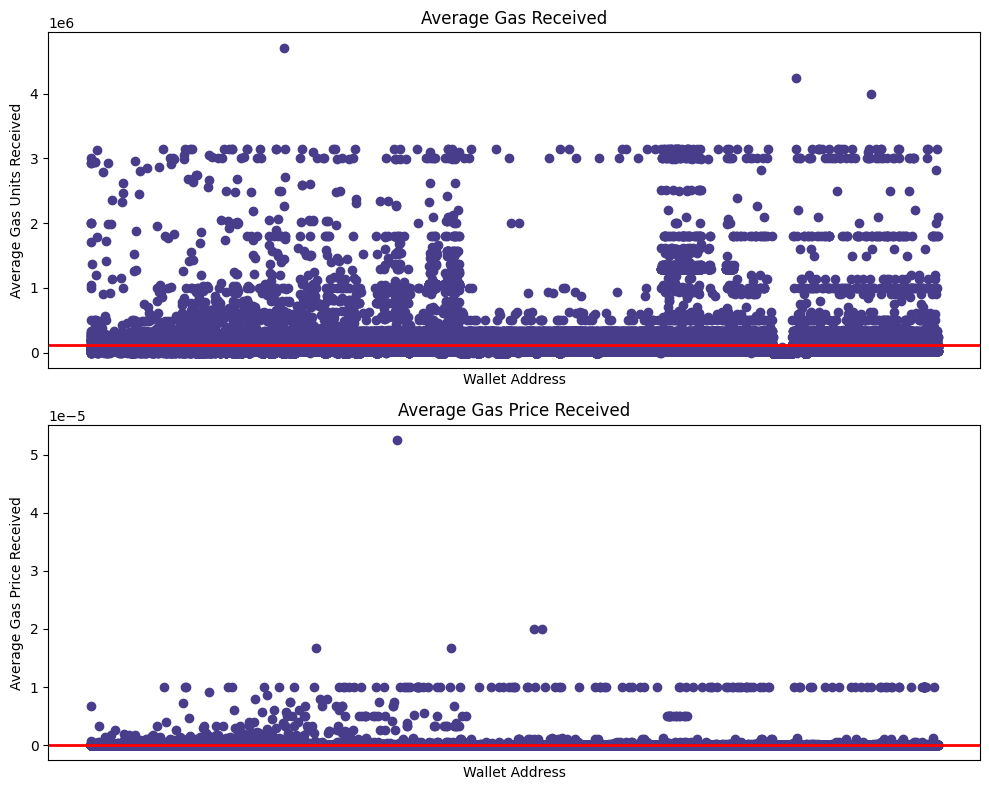

In [37]:
# RECEIVED GAS PLOTS
# Generate plots of values : 
fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].scatter(wallets, gasrec_values, color="darkslateblue")
axs[0].axhline(y=mean_avg_gas_received, color='r', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gas_received:.2f})')
axs[0].set_title('Average Gas Received')
axs[0].set_xlabel('Wallet Address')
axs[0].set_ylabel('Average Gas Units Received')
axs[0].set_xticks([])

axs[1].scatter(wallets, gasprice_rec, color="darkslateblue")
axs[1].axhline(y=mean_avg_gasprice_received, color='r', linestyle='solid', lw=2, label=f'Mean ({mean_avg_gasprice_received:.8f})')
axs[1].set_title('Average Gas Price Received')
axs[1].set_xlabel('Wallet Address')
axs[1].set_ylabel('Average Gas Price Received')
axs[1].set_xticks([])

plt.tight_layout() 
plt.show()

## Milestone 6: Prediction Modeling & Analysis
[Return to Table of Contents](#table-of-contents)

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [39]:
# Reduce dimensionality in order to visualize clusters

# Use PCA to create a reduced dimension df
scaler = StandardScaler()
scaled = scaler.fit_transform(transaction_freq)

pca = PCA(2)
pca_df = pca.fit_transform(scaled)
    

def getReducedLabels(k):
    '''
    Generates reduced labels for KMeans model with pca_df and n_clusters = k
    '''
    
    reduced_model = KMeans(n_clusters=k, n_init=10)
    reduced_label = reduced_model.fit_predict(pca_df)
    
    return (reduced_model, reduced_label)


def createPCAgraph(reduced_labels):
    '''
    Generate plot of clusters from reduced df
    '''
    
    u_labels = np.unique(reduced_labels)
 
    for i in u_labels:
        plt.scatter(pca_df[reduced_labels == i , 0] , pca_df[reduced_labels == i , 1] , label = i)
        # sns.scatterplot(pca_df, x=[reduced_labels == i, 0], y=[reduced_labels == i, 1], label = i, jitter=True)
    
    plt.title(f'K-Means on Unique Wallets with k={len(u_labels)}')
    plt.legend()
    plt.show()
    
    
    
def printClusterSize(labels, k):
    '''
    Print the number of data points belonging to each cluster
    '''
    
    for i in range(k):
        print(f"Number of data points in cluster {i}: {len([x for x in labels if x == i])}")
    

def runModel(k):
    '''
    Runs a new model given k clusters

    @Params:
    k: the amount of clusters to generate the model around

    @Retuns:
    A tuple as
    (dataframe of the centroids in the model, model itself) 
    '''
    # fit KMeans model with k clusters

    model = KMeans(n_clusters=k, n_init=10)
    model.fit(transaction_freq)


    # Explore cluster quality using silhouette score

    labels = model.labels_
    score = silhouette_score(transaction_freq, labels)
    print(f"Silhouette score for model with {k} clusters: {score}")

    # Visualize centroid values of all features in each cluster

    centroids_df = pd.DataFrame(model.cluster_centers_, columns=transaction_freq.columns)


    # Explore the number of data points belonging to each cluster from model 1

    printClusterSize(labels, k)
    
    return (centroids_df, model)

def runModelWithPrediction(k, testframe):

    model = KMeans(n_clusters=k, n_init=10)

    model = model.fit(scale(transaction_freq)) # data is your training data

    return model.predict(scale(testframe)) # test is your data to predict the cluster

We wished to expand on our anomaly detection by creating prediction models in order to generate an idea of whether a transaction is potentially fraudulent. We utilized KMeans to generate clusters based on our prior engineered features that give us insights into wallet behaviors. In order to visualize the separation of the clusters created by our trained K-Means models, we utilized PCA to reduce the dimensions to 2 and generate a scatter plot of the datapoints in the clusters. It is important to note that we generated new models on the reduced dataframe, therefore, the cluster labels do not necessarily match the cluster labels of our original models.  

Due to the nature of our problem in identifying transactions as fraudulent or not, we wanted to first consider a K-Means model with only 2 clusters. The silhouette score for this model is very high, indicating that the clusters are well defined and separated from each other. We printed a dataframe that shows the values of the centroids of each cluster and we generated a visualization to show the clusters.

In [40]:
k = 2

centroids_df_2clusters, model_2k = runModel(k)
print('\n')
centroids_df_2clusters


Silhouette score for model with 2 clusters: 0.9993142887748611
Number of data points in cluster 0: 122034
Number of data points in cluster 1: 15




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,12.285379,22.321337,1126.680068,1152.628141,34.606716,186.351267,173.878494,1.360552e+06,2.517257e+06,63188.794304,4.260239e-08,107661.056029,5.452953e-08
1,83852.533333,1175.333333,457017.642596,245580.917512,85027.866667,8.820363,261.976996,1.119852e+10,4.120994e+08,878527.166247,4.698044e-08,242057.037308,4.816690e-07


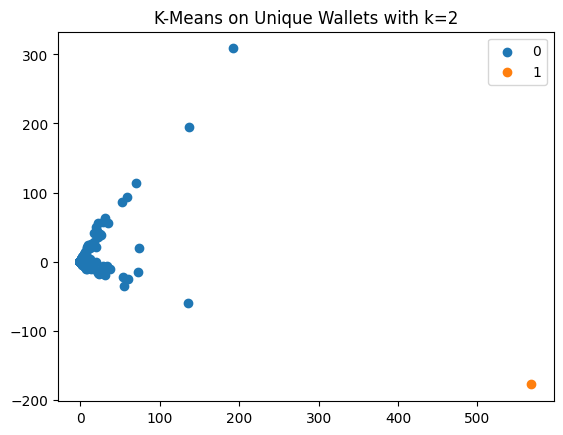

Number of data points in cluster 0: 122048
Number of data points in cluster 1: 1


In [41]:
# Visualize separation of model with 2 clusters

# Create model from reduced DF with 2 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

In [42]:
# Labels change but this is a good way to see specific wallets as they appear in specific clusters
def seeWalletsInLabel(label_number):
    '''
    Shows specific data of wallets in a label

    @Params:
    label: label as defined in the K-Means cluster

    @Retuns:
    Returns a list of wallets from the dataframe within a specific label
    '''

    testing = transaction_freq.copy()

    testing['label'] = reduced_labels.tolist()

    return testing[testing['label'] == label_number]


In [43]:
label = 1
seeWalletsInLabel(label)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x32be343b94f860124dc4fee278fdcbd38c102d88,32599.0,524979.0,2.607735e+07,2.589535e+07,557578.0,799.9434,49.326441,3.344510e+09,1.102613e+10,102595.476364,4.861886e-08,21002.988691,4.846665e-08,1


In order to identify the optimal number of clusters for our prediciton modeling, we followed the 'Elbow Method'. From this graph we identified that using 5 clusters in our KMeans model optimally reduces distortion. 

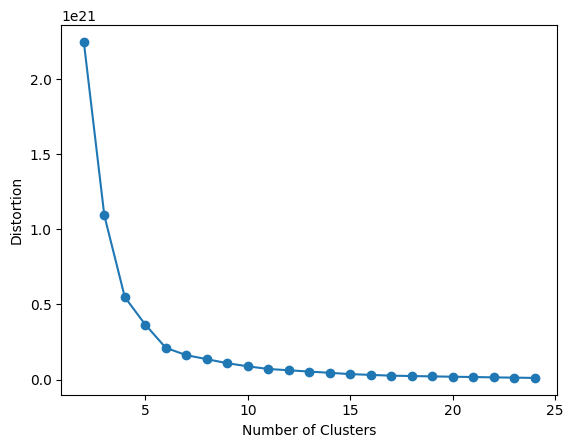

In [44]:
# hyperparameter tuning elbow method

dist = []
kr = range(2,25)
for k in kr:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(transaction_freq)
    dist.append(model.inertia_)
    
plt.plot(kr, dist, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

From the elbow method, we noted that the elbow occurs somewhere between and 8, meaning that the optimal number of clusters for this model is between 5 and 8. We started by fitting a K Means model with 5 clusters and looked at the centroid values of each feature for each cluster in order to gain insights into the meanings of each cluster. One of the clusters is characterized by high from_frequency and no to_frequency meaning members of this cluster send transactions but not receive any, additionally, the average values that members of this cluster sends is very low with very high gas used. Next, we considered the silhouette score of the model which tells us about the quality of the clusters that were generated during KMeans modeling. This high silhouette score tells us that our clusters are well defined and separated, indicating that this model is capable of generating accurate clusters than can be used to understand the behavior of wallets addresses that are assigned to each cluster. Due to the nature of these values and the visualized clusters after dimensionality reduction, we can see that there is a cluster containing one data point (matching the cluster described above) that describes an outlier in the bottom right corner, giving us a framework for identifying potentially fraudulent wallets. 

In [45]:
# fit KMeans model with 5 clusters
k = 5

centroids_df_5clusters, model_5k = runModel(k)
print('\n')
centroids_df_5clusters

Silhouette score for model with 5 clusters: 0.998828687811374
Number of data points in cluster 0: 122011
Number of data points in cluster 1: 1
Number of data points in cluster 2: 11
Number of data points in cluster 3: 12
Number of data points in cluster 4: 14




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,9.791855,16.006786,9.059475e+02,9.403401e+02,25.798641,186.378652,173.909469,9.876103e+05,1.553089e+06,63135.189410,4.260584e-08,1.075515e+05,5.453146e-08
1,371299.000000,1.000000,1.115021e+06,2.000000e+01,371300.000000,3.003026,20.000000,3.341691e+10,9.000000e+04,90000.000000,3.773797e-08,9.000000e+04,5.000000e-08
2,73954.545455,1429.818182,5.023260e+05,3.348689e+05,75384.363636,11.465113,353.262139,1.058406e+10,2.172837e+08,769174.577837,4.608617e-08,1.134465e+05,6.431850e-07
3,2716.583333,64236.750000,2.173113e+06,2.160375e+06,66953.333333,66.661950,5.090231,2.787092e+08,9.806554e+09,8549.623030,4.051571e-09,1.227436e+06,5.614381e-08
4,24636.428571,144.142857,7.821527e+04,2.587004e+02,24780.571429,10.576332,13.049529,4.308995e+09,2.721134e+08,894151.479282,4.781399e-08,2.437535e+05,3.176836e-08


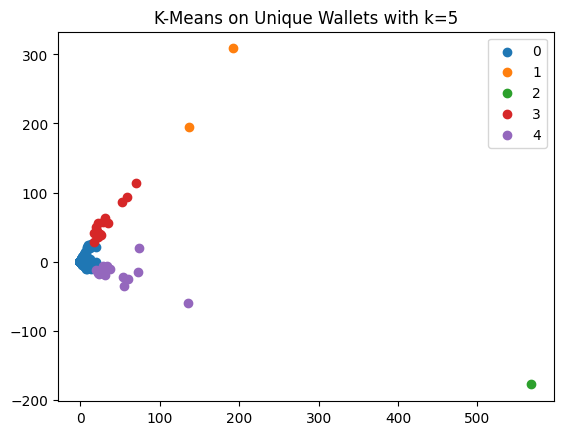

Number of data points in cluster 0: 122011
Number of data points in cluster 1: 2
Number of data points in cluster 2: 1
Number of data points in cluster 3: 15
Number of data points in cluster 4: 20


In [46]:
# Visualize separation of model with 5 clusters

# Create model from reduced DF with 5 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

Next, we wanted to visualize the cluster separation for a model with 6 clusters.

In [47]:
# fit KMeans model with 6 clusters
k = 6

centroids_df_6clusters, model_6k = runModel(k)
print('\n')
centroids_df_6clusters

Silhouette score for model with 6 clusters: 0.9988653225345222
Number of data points in cluster 0: 122008
Number of data points in cluster 1: 11
Number of data points in cluster 2: 7
Number of data points in cluster 3: 1
Number of data points in cluster 4: 8
Number of data points in cluster 5: 14




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,9.745615,15.552988,9.057870e+02,9.401802e+02,25.298603,186.383202,173.913741,9.866097e+05,1.452512e+06,63136.561099,4.260665e-08,1.075329e+05,5.453188e-08
1,73954.545455,1429.818182,5.023260e+05,3.348689e+05,75384.363636,11.465113,353.262139,1.058406e+10,2.172837e+08,769174.577837,4.608617e-08,1.134465e+05,6.431850e-07
2,4657.000000,93796.571429,3.725336e+06,3.700474e+06,98453.571429,114.277629,7.219742,4.777871e+08,1.238569e+10,14656.496623,6.945551e-09,1.313822e+06,5.380944e-08
3,371299.000000,1.000000,1.115021e+06,2.000000e+01,371300.000000,3.003026,20.000000,3.341691e+10,9.000000e+04,90000.000000,3.773797e-08,9.000000e+04,5.000000e-08
4,708.875000,21210.000000,2.788099e+03,5.439197e+03,21918.875000,0.491641,1.381237,1.562964e+07,5.406830e+09,2756.064847,3.679366e-09,1.015289e+06,5.113567e-08
5,24636.428571,144.142857,7.821527e+04,2.587004e+02,24780.571429,10.576332,13.049529,4.308995e+09,2.721134e+08,894151.479282,4.781399e-08,2.437535e+05,3.176836e-08


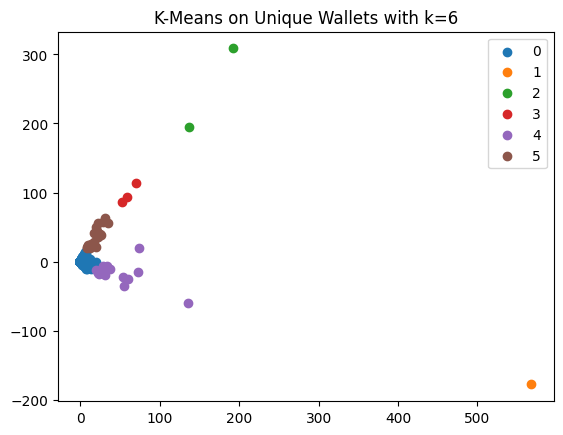

Number of data points in cluster 0: 122004
Number of data points in cluster 1: 1
Number of data points in cluster 2: 2
Number of data points in cluster 3: 3
Number of data points in cluster 4: 20
Number of data points in cluster 5: 19


In [48]:
# Visualize separation of model with 6 clusters

# Create model from reduced DF with 6 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

We also wanted to visualize cluster separation for a model with 8 clusters.

In [49]:
# fit KMeans model with 8 clusters
k = 8

centroids_df_8clusters, model_8k = runModel(k)
print('\n')
centroids_df_8clusters

Silhouette score for model with 8 clusters: 0.9970891330212084
Number of data points in cluster 0: 121981
Number of data points in cluster 1: 5
Number of data points in cluster 2: 7
Number of data points in cluster 3: 1
Number of data points in cluster 4: 12
Number of data points in cluster 5: 8
Number of data points in cluster 6: 6
Number of data points in cluster 7: 29




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,8.662464,15.523811,7.962564e+02,8.463719e+02,24.186275,186.416823,173.903065,7.046679e+05,1.450519e+06,6.292099e+04,4.260642e-08,1.075205e+05,5.452600e-08
1,98759.000000,17.400000,2.639191e+05,9.781649e+02,98776.400000,1.034022,37.698445,1.230762e+10,1.232600e+06,1.284533e+06,4.598272e-08,9.520567e+04,4.297316e-08
2,4657.000000,93796.571429,3.725336e+06,3.700474e+06,98453.571429,114.277629,7.219742,4.777871e+08,1.238569e+10,1.465650e+04,6.945551e-09,1.313822e+06,5.380944e-08
3,371299.000000,1.000000,1.115021e+06,2.000000e+01,371300.000000,3.003026,20.000000,3.341691e+10,9.000000e+04,9.000000e+04,3.773797e-08,9.000000e+04,5.000000e-08
4,26219.833333,164.750000,6.013238e+04,2.932323e+02,26384.583333,1.280554,13.976550,4.583989e+09,3.164121e+08,9.607816e+05,4.826957e-08,2.502488e+05,2.867099e-08
5,708.875000,21210.000000,2.788099e+03,5.439197e+03,21918.875000,0.491641,1.381237,1.562964e+07,5.406830e+09,2.756065e+03,3.679366e-09,1.015289e+06,5.113567e-08
6,53284.166667,2606.833333,7.009984e+05,6.131112e+05,55891.000000,20.157690,616.231883,9.147765e+09,3.973262e+08,3.397095e+05,4.617237e-08,1.286472e+05,1.143361e-06
7,5608.931034,138.620690,4.744324e+05,3.954590e+05,5747.551724,36.689262,207.339267,1.370216e+09,1.017265e+07,9.996040e+05,4.373187e-08,1.663110e+05,7.901228e-08


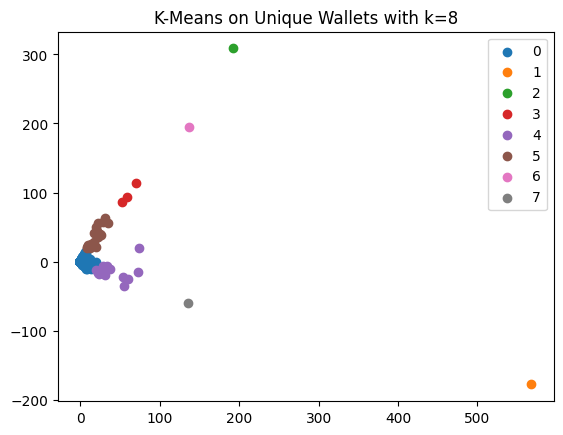

Number of data points in cluster 0: 122004
Number of data points in cluster 1: 1
Number of data points in cluster 2: 1
Number of data points in cluster 3: 3
Number of data points in cluster 4: 19
Number of data points in cluster 5: 19
Number of data points in cluster 6: 1
Number of data points in cluster 7: 1


In [50]:
# Visualize separation of model with 8 clusters

# Create model from reduced DF with 8 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

In [ ]:
# be sure this label number corresponds to the outlier you'd like to see the wallet address of
# it may change with each compilation

# 4 clusters above have only a single data point. let's observe them below

label = 1
seeWalletsInLabel(label)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x32be343b94f860124dc4fee278fdcbd38c102d88,32599.0,524979.0,2.607735e+07,2.589535e+07,557578.0,799.9434,49.326441,3.344510e+09,1.102613e+10,102595.476364,4.861886e-08,21002.988691,4.846665e-08,1


In [52]:
label = 2
seeWalletsInLabel(label)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x2a65aca4d5fc5b5c859090a6c34d164135398226,371299.0,1.0,1.115021e+06,20.0,371300.0,3.003026,20.0,3.341691e+10,90000.0,90000.0,3.773797e-08,90000.0,5.000000e-08,2


In [53]:
label = 6
seeWalletsInLabel(label)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,310093.0,47.0,1.096730e+06,226.597975,310140.0,3.536778,4.821234,1.214644e+10,1521000.0,39170.297298,3.793957e-08,32361.702128,6.890291e-08,6


In [54]:
label = 7
seeWalletsInLabel(label)

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x2910543af39aba0cd09dbb2d50200b3e800a63d2,15359.0,3640.0,1.314267e+07,1.139150e+07,18999.0,855.698566,3129.533519,1.562019e+09,152624627.0,101700.566443,4.143534e-08,41929.842582,7.830597e-07,7


In [55]:
# display how PCA reduced the dimensionality
components_matrix = pd.DataFrame(
    pca.components_, 
    columns=transaction_freq.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

components_matrix

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
PC1,0.243027,0.453047,0.454655,0.443910,0.477117,0.029799,0.026615,0.229379,0.223618,0.005880,0.000930,0.004948,0.001578
PC2,0.604842,-0.266197,-0.244279,-0.279096,0.231598,-0.055460,-0.051856,0.585261,-0.149127,0.038638,-0.000501,-0.007399,0.004413


In [ ]:
# bring in data from 2023 to determine if we can predict outliers for fraudulent behavior
testing_df = clean_data('transactions-6.csv')

# prediction_model = runModelWithPrediction(k, testing_df)
prediction_model = model_6k.predict(testing_df)


In [57]:
def print_unique_counts(arr):
    counts = {}
    for item in arr:
        if item not in counts:
            counts[item] = 0
        counts[item] += 1

    for item, count in counts.items():
        print(f"{item}: {count}")

print_unique_counts(prediction_model)

0: 1567076
2: 30
5: 38
4: 43
1: 21
3: 4


In [60]:
# for comparison, see how the breakdown of labels looked in the original data 
print_unique_counts(model_6k.labels_)

2: 7
3: 1
1: 11
0: 122008
5: 14
4: 8


Look into this wallet, it is the outlier wallet in all the dataframes:
https://etherscan.io/address/0x32be343b94f860124dc4fee278fdcbd38c102d88#multichain-portfolio